In [1]:
# Create Python package from Rust code
# maturin develop --release

In [2]:
import benchmark_utils as benchmark_utils

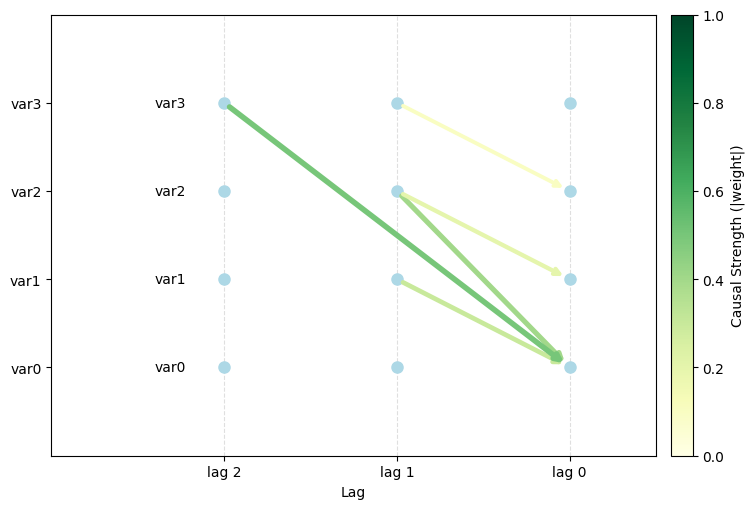

In [3]:
var_names = [f"var{i}" for i in range(4)]
causal_edges = [
    # (orig, dest, lag, weight)
    ("var1", "var0", 1, 0.3),
    ("var2", "var0", 1, 0.4),
    ("var3", "var0", 2, 0.5),
    ("var2", "var1", 1, 0.2),
    ("var3", "var2", 1, 0.1),
]

causal_structure = benchmark_utils.CausalStructure(causal_edges, var_names)
causal_structure.plot()

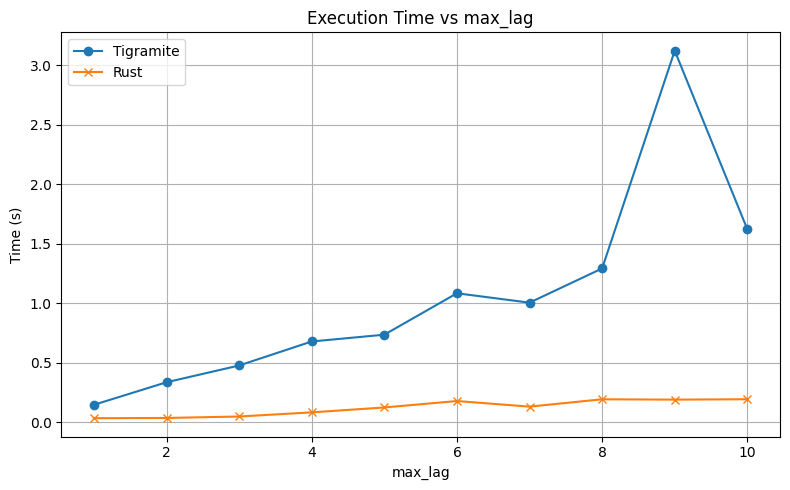

In [ ]:
fixed_params = {
    # "max_lag": 2,
    "alpha": 0.05,
    "cond_size": 3,
    "subsets": 1,
}

bench = benchmark_utils.BenchmarkParam(
    n_time=10000, n_vars=5, causal_structure=causal_structure, noise_level=0.05
)

bench.run(param_name="max_lag", param_values=range(1, 11), fixed_params=fixed_params)

bench.plot()

In [ ]:
# TODO: Use tqdm
# TODO: benchmark average times 5 runs

In [ ]:
# On average, each pair of corresponding elements in the two matrices differ by about x% of their combined magnitude.

In [5]:
df

,max_lag,time_tigramite,time_rust,mean_rel_error,cosine_similarity,pearson_corr
0,1,0.144921,0.032090,0.010757,0.999959,0.999917
1,2,0.334586,0.034082,0.013695,0.999982,0.999976
2,3,0.475713,0.046449,0.000511,1.000000,1.000000
3,4,0.677663,0.081212,0.002405,1.000000,1.000000
4,5,0.734684,0.122469,0.001004,0.999999,0.999997
5,6,1.083216,0.176544,0.005464,0.999997,0.999996
6,7,1.004219,0.129450,0.003211,0.999999,0.999998
7,8,1.292056,0.191304,0.004164,0.999999,0.999998
8,9,3.123988,0.188446,0.001680,1.000000,0.999999
9,10,1.621512,0.191717,0.004180,0.999998,0.999997
